In [1]:
from CBQ import account
from CBQ import visualizations
import secrets
import json
import matplotlib.pyplot as plt


acc = account.CoinbaseAccount(
    API_KEY=secrets.API_KEY,
    API_SECRET=secrets.API_SECRET,
    API_PASSPHRASE=secrets.API_PASSPHRASE)

Price of DOGE: 0.262
[{'amount': 88.8, 'label': 'DOGE', 'price': 0.262, 'usd': 23.2656, 'percentage': 0.9000712610576502}, {'amount': 2.58302, 'label': 'USD', 'price': 1, 'usd': 2.58302, 'percentage': 0.09992873894234972}]


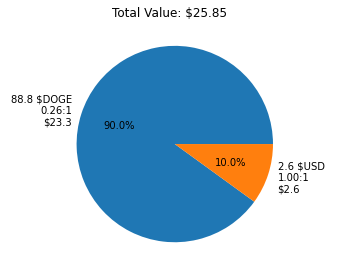

In [2]:
wallets = acc.get_wallets()
print(wallets)


fig, ax = visualizations.show_pie(wallets)
plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

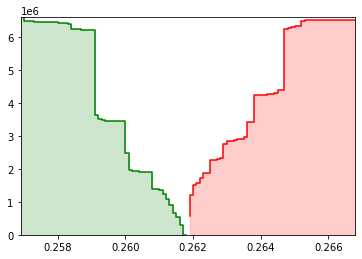

In [3]:
r = acc.get_book("DOGE-USD")
b = json.loads(r.content)

visualizations.show_book(b)

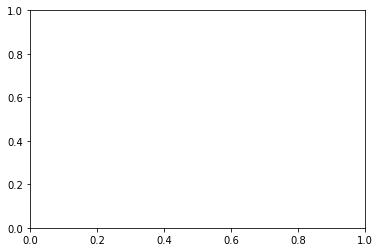

In [5]:
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

def animate(i):
    r = acc.get_book("DOGE-USD")

    b = json.loads(r.content)

    fig, ax1 = visualizations.show_book(b)


ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()


In [ ]:
import pandas as pd

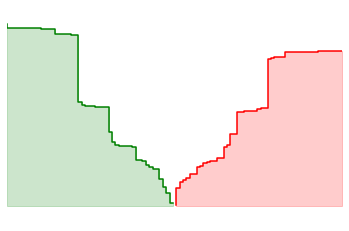

In [ ]:
book = json.loads(r.content)
bids = pd.DataFrame(book['bids'])
bids = bids.astype(float)
bids = bids.sort_values(by=[0], ascending=False)
bids["cumulative_coins"] = bids[1].cumsum()
bids["cumulative_orders"] = bids[2].cumsum()
bids_f = bids.head(50)

plt.fill_between(x=bids_f[0],
                 y1=bids_f["cumulative_coins"],
                 step="post",
                 color="green",
                 alpha=0.2)

plt.step(x=bids_f[0], y=bids_f["cumulative_coins"],
         where="post", color="green")

asks = pd.DataFrame(book['asks'])
asks = asks.astype(float)
asks = asks.sort_values(by=[0], ascending=True)
asks["cumulative_coins"] = asks[1].cumsum()
asks["cumulative_orders"] = asks[2].cumsum()
asks_f = asks.head(50)

plt.step(x=asks_f[0], y=asks_f["cumulative_coins"],
         where="pre", color="red")

plt.fill_between(x=asks_f[0], 
    y1=asks_f["cumulative_coins"], 
    step="pre", 
    color="red",
    alpha=0.2)

plt.margins(x=0, y=0.1) 
plt.axis("off")

plt.show()
